## Mercedes Car Price Prediction
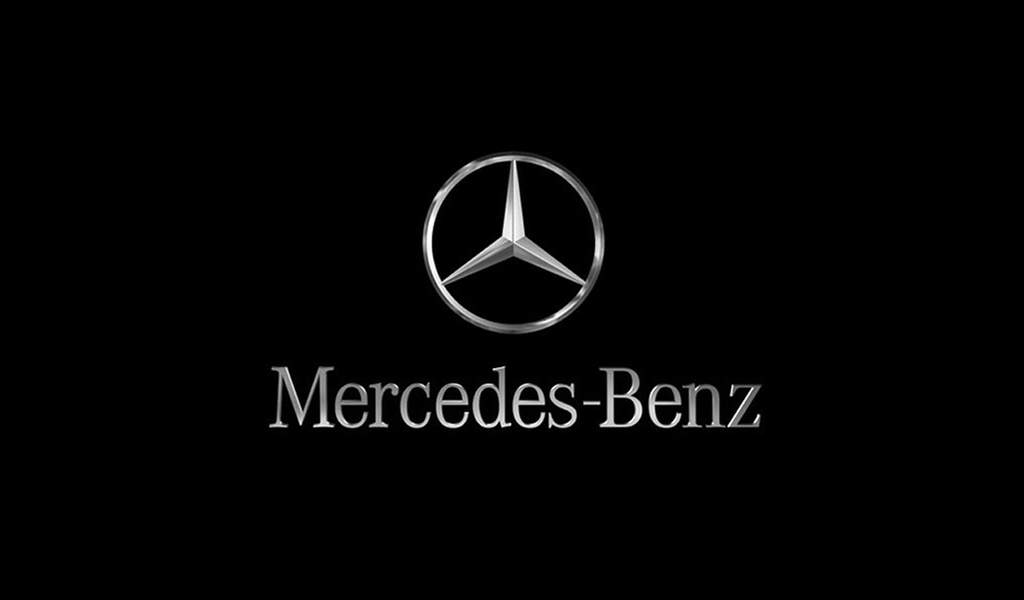

## Introduction
In this kernel we are going to analyse, visualize and predict using Mercedes data set and using some methods like linear regression, polynominal regression etc. 

<font color = 'purple'>
Content : 

1. [Load and Check Data](#1)    
1. [Variable Description](#2)
1. [Data Preperation and Visualization](#3)
1. [Machine Learning (Regression)](#4) 
    * [Linear Regression](#5)
    * [Polynomial Regression](#6)
    * [Support Vector Regression (SVR)](#7)
    * [Decision Tree](#8)
    * [Random Forest](#9)
1. [Model Selection](#10)
1. [Conclusion](#11)
 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = '1'></a><br>
## Load and Check Data

In [ ]:
data = pd.read_csv('/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv')

In [ ]:
data.head(7)

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [ ]:
data.corr() #corrolation between columns

<a id = '2'></a><br>
## Variable Description

In [ ]:
data.head()

* model : Model of car
* year : The year that car made
* price : Price (Sterlin)
* Transmission : Type of gear
* milage : How many miles the car went (1 mil = 1,609344 km)
* fuelType : Fuel type
* tax : tax
* mpg : Miles per gallon (1 galon = 3,78541178 liters)
* engine size : Size of engine (liters)

Price will be our target column becouse we want to predict that and the other columns will be our tools that predict the price. However will we use all columns ?

<a id = '3'></a><br>
## Data Preparetion and Visualization

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Here is corrolation map. If the value near to -1 that means there is negative corrolation between values. For example : milage and year. Naturally, the milage is increases as the car is driven. Similarly if the value near to 1 that means there is positive corrolation between values.

In [ ]:
data.corr()["price"].sort_values()

Price is our target value 

In [ ]:
data_model = data.model
data_price = data.price
#Visiualization
plt.figure(figsize=(45,20))
sns.barplot(x = data_model, y = data_price)
plt.xticks(rotation = 90) # rotation of countries's names
plt.xlabel('Model')
plt.ylabel('Price')
plt.title('Model/Price')
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
sns.distplot(data["price"])
plt.show()

As you see, after 75.000 there are unnecessary number of values considered. They would destroy our predictions.

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(data.year)
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=data.mileage, y=data.price, data=data)
plt.show()

In [ ]:
data.sort_values('price', ascending=False).head(20)

In [ ]:
data.sort_values('price', ascending=True).head(20)

In [ ]:
len(data)

In [ ]:
len(data) * 0.01

We remove 1 percent of the data set (the part that is most likely the outlier that distorts the data) and we get a 99 percent data set.

* nnpDf = ninety nine percent data frame

In [ ]:
nnpDf = data.sort_values("price",ascending = False).iloc[131:]
nnpDf

In [ ]:
nnpDf.describe()

In [ ]:
data.describe()

As you see, there are not massive changes and it disturbuted more balanced

In [ ]:
plt.figure(figsize=(13,7))
sns.distplot(nnpDf["price"])
plt.show()

Lets have a look at that the value year which is corrolated with price

In [ ]:
nnpDf.groupby('year').mean()['price']

In year 1970, mean of price is too high by compering to year order. Also this would spoil our model.

In [ ]:
nnpDf[nnpDf.year != 1970].groupby("year").mean()["price"]

Better now !

In [ ]:
nnpDf.drop('transmission', axis=1, inplace=True)

In [ ]:
nnpDf.drop('fuelType', axis=1, inplace=True)

In [ ]:
nnpDf.drop('model', axis=1,inplace=True)

I droped the string values. nnpDf is looking weird  isn't it ?

In [ ]:
df = nnpDf

In [ ]:
df.head()

In [ ]:
sns.pairplot(df)
plt.show()

<a id = '4'></a><br>
## Machine Learning (Regression)

### Splitting

In [ ]:
y = df['price'].values
x = df.drop('price', axis=1).values

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 0)

<a id = '5'></a><br>
### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)
y_pred_lin_reg = linear_regression.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_lin_reg}')

In [ ]:
print('R Square Score for Linear Regression : ', r2_score(y_test, y_pred_lin_reg))

<a id = '6'></a><br>
### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x,y)
linear_regression2 = LinearRegression()
linear_regression2.fit(x_poly, y)
y_pred_poly_reg = linear_regression2.predict(x_poly)

In [ ]:
print(f'y: {y}\nprediction: {y_pred_poly_reg}')

In [ ]:
print('R Square Score for Polynomial Regression : ', r2_score(y, y_pred_poly_reg))

<a id = '7'></a><br>
### SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler1 =StandardScaler()
scaled_x_train = standard_scaler1.fit_transform(x_train)
scaled_x_test = standard_scaler1.transform(x_test) # dont learn just transform
standard_scaler2=StandardScaler()
scaled_y_train = np.ravel(standard_scaler2.fit_transform(y_train.reshape(-1,1)))
scaled_y_test = np.ravel(standard_scaler2.fit_transform(y_test.reshape(-1,1)))

We scaled the variables that SVR make predictions better.

In [ ]:
from sklearn.svm import SVR
svr_regression = SVR(kernel="rbf") # other kernel types : linear, poly, rbf, sigmoid
svr_regression.fit(scaled_x_train, scaled_y_train)
y_pred_svr_reg = svr_regression.predict(scaled_x_test)

In [ ]:
print(f'y_scaled: {scaled_y_test}\nprediction: {y_pred_svr_reg}')

In [ ]:
print('R Square Score for Support Vector Regression : ', r2_score(scaled_y_test, y_pred_svr_reg))

<a id = '8'></a><br>
### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(x_train, y_train)
y_pred_dt_reg = decision_tree_reg.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_dt_reg}')

In [ ]:
print('R Square Score for Decision Tree Regression : ', r2_score(y_test, y_pred_dt_reg))

<a id = '9'></a><br>
### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators = 50, random_state= 0 ) # n_estimators = numbor of estimator tree
random_forest_reg.fit(x_train, y_train)
y_pred_rf_reg = random_forest_reg.predict(x_test)

In [ ]:
print(f'y_test: {y_test}\nprediction: {y_pred_rf_reg}')

In [ ]:
print('R Square Score for Random Forest Regression : ', r2_score(y_test, y_pred_rf_reg))

In [ ]:
df.head(20)

In [ ]:
print(random_forest_reg.predict([[2020, 1000, 140, 29.2, 4.0]]))

In [ ]:
df.tail(20)

In [ ]:
print(random_forest_reg.predict([[2000, 90000, 290, 30.4, 3.0]]))

<a id = '10'></a><br>
## Model Selection

We tried the algoritms to our data. Now the thing we must do is getting better by making eleminations by the helping of backward elemination. 

The best model for us is Random forest .

In [ ]:
df.head()

In [ ]:
import statsmodels.api as sm 
x = np.append(arr=np.ones((12988,1)).astype(int), values = x, axis = 1)
x_opt = x[:, [0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

As you see in P>|t| there is no need to make elemination. 

<a id = '11'></a><br>
## Conclusion

As a conclusion, we checked, prapered and visualized the data first. Then, we tried the models for the data. With respect to R squere score we choose best model. Finally, elimation of columns that spoil data. Thank you, hope its usefull.